## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
# Display the data table for preview
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.
mouse_number = len(combine_data_df["Mouse ID"].unique())

mouse_number

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

num_mice_ID = combine_data_df.loc[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


num_mice_ID

array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 

unique_locate = combine_data_df.loc[combine_data_df["Mouse ID"] == "g989"]
unique_locate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combine_data_df.loc[combine_data_df["Mouse ID"] != "g989"]


clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice in the clean DataFrame.
cleaner_mouse_df = len(clean_mice_df["Mouse ID"].unique())
cleaner_mouse_df 

248

## Summary Statistics

In [63]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Finds the average tumor level for each Drug Regimen 
mouse_average = clean_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Finds the median tumor level for each Drug Regimen 
mouse_median = clean_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Finds the variance between subjects in tumor level for each Drug Regimen 
mouse_variance =  clean_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Finds the standard deviation in variance in tumor level for each Drug Regimen 
mouse_std = clean_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Finds the standard of errors for each Drug Regimen 
mouse_sem = clean_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Creates a dataframe using the series' above
summary_stats_df = pd.DataFrame ({
                                "Average": mouse_average,
                                "Median" : mouse_median,
                                "Variance" : mouse_variance,
                                "Standard Deviation" : mouse_std,
                                "Standard Of Errors" : mouse_sem
})

summary_stats_df

,Average,Median,Variance,Standard Deviation,Standard Of Errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
new_summary = pd.DataFrame.agg({'Average' : [mouse_average], 'Median' : [mouse_median], "Variance" : [mouse_variance],
                                 "Standard Deviation": [mouse_std], 
                                 "Standard of Errors": [mouse_sem]
                                })

TypeError: aggregate() missing 1 required positional argument: 'func'

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
new_summary = summary_stats.agg({'Average' : mouse_average, 'Median' : mouse_median, "Variance" : mouse_variance, "Standard Deviation": mouse std, "Standard of Errors": mouse_sem})

SyntaxError: invalid syntax (<ipython-input-72-0fd39240eb99>, line 4)

## Bar and Pie Charts

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

clean_mice_df.set_index("Drug Regimen")

mouse_id = clean_mice_df["Mouse ID"]




TypeError: no numeric data to plot

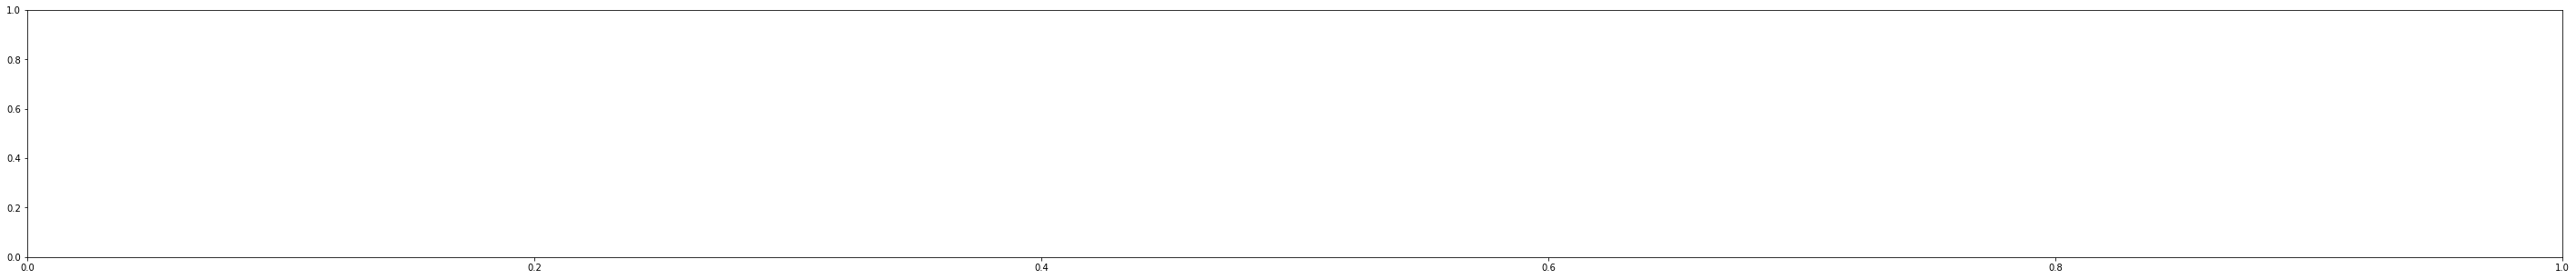

In [35]:
plt.figure(figsize= (50,5))
mouse_id.plot(kind="bar", facecolor="red")
plt.tight_layout

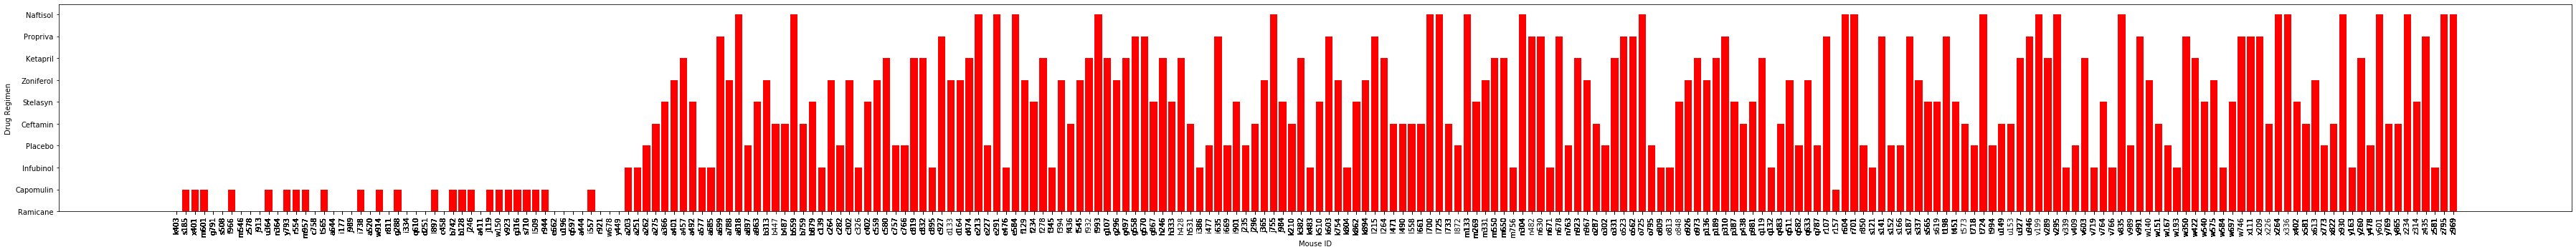

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice = ["Mouse ID"]
drug = ["Drug Regimen"]
x_axis = np.arange(len(clean_mice_df))
ticks = clean_mice_df["Mouse ID"]

plt.figure(figsize= (50,5))
plt.bar(clean_mice_df["Mouse ID"], clean_mice_df["Drug Regimen"],  color= "r", align="center")
plt.xticks(ticks,clean_mice_df["Mouse ID"], rotation="vertical")
plt.xlabel("Mouse ID")
plt.ylabel("Drug Regimen")     
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x27cddd67a48>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

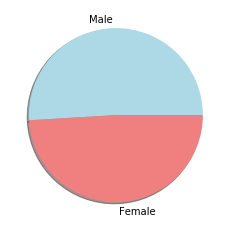

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["lightblue", "lightcoral"]

male = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Male")])
female = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Female")])
sex = [male, female]
plt.pie(sex, labels = labels, colors=colors, shadow=True)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# will not always be the 45 make sure to use the .max() function 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
